In [1]:
# -*- coding: utf-8 -*-
"""Number Recognition.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1TjJ13-x_FSRlTMm37Y62EUbUAIbB3O3D
"""

'Number Recognition.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1TjJ13-x_FSRlTMm37Y62EUbUAIbB3O3D\n'

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

11490434/11490434 [==============================] - 0s 0us/step


In [4]:

# Define the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2920 - accuracy: 0.9155
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1055 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9763


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')


313/313 - 1s - loss: 0.0707 - accuracy: 0.9771 - 594ms/epoch - 2ms/step

Test accuracy: 97.71%


In [8]:
# Make predictions on a sample image
predictions = model.predict(x_test)
sample_image_index = 0  # Change this index to see predictions for different images
predicted_label = np.argmax(predictions[sample_image_index])
true_label = y_test[sample_image_index]


313/313 [==============================] - 1s 2ms/step


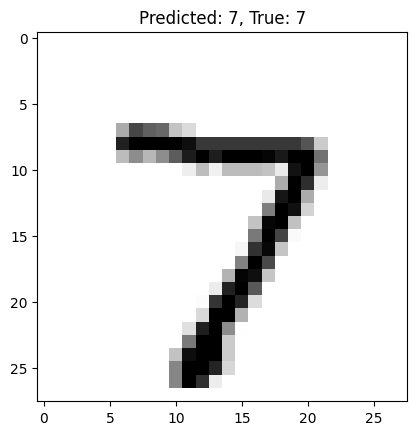

In [9]:
# Display the sample image and prediction
plt.figure()
plt.imshow(x_test[sample_image_index], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()